# Read and Visualize GeoJSON data


## GeoJSON and JSON

"GeoJSON is an open standard format designed for representing simple geographical features, along with their non-spatial attributes. It is based on the JSON format.

The features include points (therefore addresses and locations), line strings (therefore streets, highways and boundaries), polygons (countries, provinces, tracts of land), and multi-part collections of these types. GeoJSON features need not represent entities of the physical world only; mobile routing and navigation apps, for example, might describe their service coverage using GeoJSON."(Wiki)


"JSON (JavaScript Object Notation, pronounced /ˈdʒeɪsən/; also /ˈdʒeɪˌsɒn/) is an open standard file format and data interchange format that uses human-readable text to store and transmit data objects consisting of attribute–value pairs and arrays (or other serializable values). It is a common data format with diverse uses" (Wiki)

---
DTR

# Import Packages

In [1]:
import matplotlib.pyplot as plt

In [2]:
import pandas as pd

In [3]:
import cartopy
import cartopy.crs as ccrs
import cartopy.feature as cfeature

from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER

In [4]:
import cartopy.io.img_tiles as cimgt
#NB: Stamen basemaps are not be available from the usual source from 31 Oct 2023

In [5]:
import geopandas as gpd

In [6]:
gpd.__version__

'0.13.2'

In [7]:
import fiona

In [8]:
fiona.__version__

'1.9.4'

In [9]:
import os

## Fiona house-keeping

**NB** The KML driver isn't enabled by default in Fiona. You have to enable it.

In [10]:
fiona.drvsupport.supported_drivers['kml'] = 'rw' # enable KML support which is disabled by default
fiona.drvsupport.supported_drivers['KML'] = 'rw' # enable KML support which is disabled by default

In [11]:
##gpd.io.file.fiona.drvsupport.supported_drivers['KML'] = 'rw'

## Directory Management

In [12]:
os.getcwd()

'/media/donald/disk4nvme/GEOSPATIAL_DATA_READ_PROCESS'

In [13]:
dir_data = '/media/donald/disk10/DATA_GEOSPATIAL_SAT_READ/GEOJSON//'
dir_data

'/media/donald/disk10/DATA_GEOSPATIAL_SAT_READ/GEOJSON//'

In [14]:
# list the files in the directory
os.listdir(dir_data)

['ITC_HomeofGIS.geojson',
 'ITC_HomeofGIS.topojson',
 'france.geojson',
 'switzerland.geojson',
 'world-cities.geojson']

# Filename

In [15]:
fname_data =   os.path.join(dir_data, 'world-cities.geojson')
fname_data

'/media/donald/disk10/DATA_GEOSPATIAL_SAT_READ/GEOJSON//world-cities.geojson'

# Read the data using geopandas

In [16]:
gdf_GeoJSON = gpd.read_file(fname_data, driver='GeoJSON')

In [17]:
gdf_GeoJSON

,city,country,region,longitude,latitude,accentcity,population,geometry
0,yungho,tw,03,121.496111,25.000000,Yungho,207852,POINT (121.49611 25.00000)
1,mulchen,cl,06,-72.233333,-37.716667,Mulchen,22170,POINT (-72.23333 -37.71667)
2,oceanside,us,NY,-73.640556,40.638611,Oceanside,32622,POINT (-73.64056 40.63861)
3,llaillay,cl,01,-70.966667,-32.850000,Llaillay,16646,POINT (-70.96667 -32.85000)
4,lodwar,ke,08,35.600000,3.116667,Lodwar,20219,POINT (35.60000 3.11667)
...,...,...,...,...,...,...,...,...
19316,kolpashevo,ru,75,82.908889,58.313056,Kolpashevo,27876,POINT (82.90889 58.31306)
19317,lyudinovo,ru,25,34.447778,53.866389,Lyudinovo,41392,POINT (34.44778 53.86639)
19318,pulwama,in,12,74.916667,33.883333,Pulwama,20073,POINT (74.91667 33.88333)
19319,north druid hills,us,GA,-84.313333,33.816667,North Druid Hills,21320,POINT (-84.31333 33.81667)


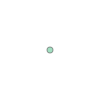

In [18]:
gdf_GeoJSON["geometry"][0]

In [19]:
gdf_GeoJSON["geometry"][10:15]

10     POINT (-42.68333 -5.36667)
11    POINT (-48.66667 -28.23333)
12     POINT (-49.33333 -5.15000)
13     POINT (121.75000 24.76667)
14      POINT (49.18250 11.28472)
Name: geometry, dtype: geometry

## Quick plot

<Axes: >

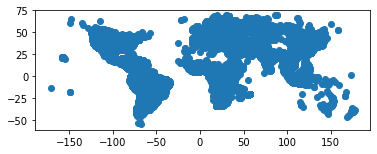

In [20]:
gdf_GeoJSON.plot()#[0]

# Plot using Cartopy - World Cities

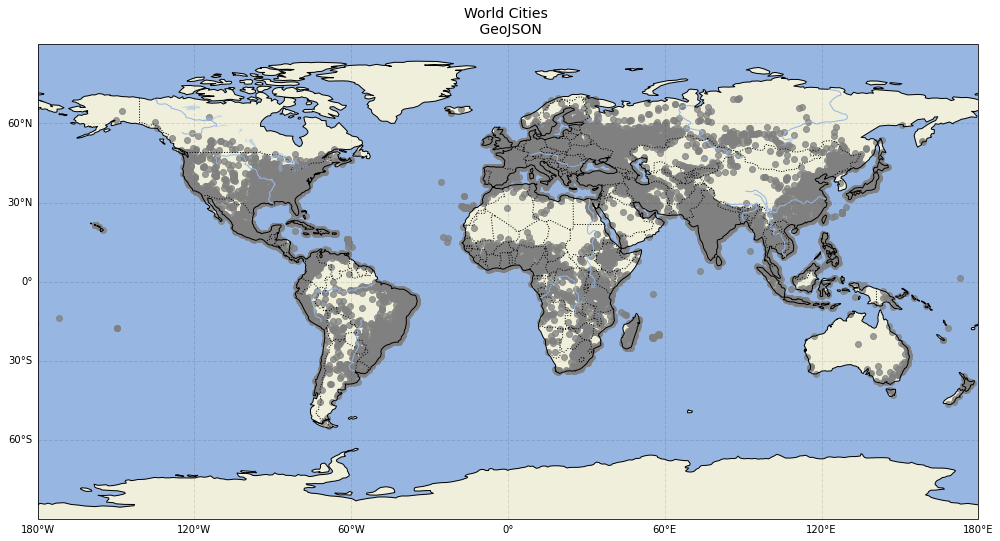

In [21]:
fig = plt.figure()
fig.set_size_inches(14, 12)
ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())
#set_extent(extents, crs=None)[source]
#Set the extent (x0, x1, y0, y1) of the map in the given coordinate system.
#If no crs is given, the extents’ coordinate system will be assumed to be the Geodetic
#version of this axes’ projection.
#ax.set_extent([30, 45, -8, 8], crs=ccrs.PlateCarree())


ax.set_global() 

## add features
ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.OCEAN)
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.add_feature(cfeature.LAKES, alpha=0.5)
ax.add_feature(cfeature.RIVERS)

### add data
#ax.add_geometries(gdf_GeoJSON["geometry"], crs=ccrs.PlateCarree(), alpha=0.5)


gdf_GeoJSON.plot(ax=ax, color='grey', alpha=0.75 )



##### add gridlines and coordinates
gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True, linewidth=1, color="k", alpha=0.1, linestyle="--")
gl.top_labels = False
gl.right_labels = False
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
#gl.ylines = True
#gl.xlines = True

### add title
ax.set_title('World Cities \n GeoJSON',
             fontsize = 14,
             y=1.01)

plt.tight_layout()

plt.show()

# Plot using Cartopy - East Africa by setting the view extent

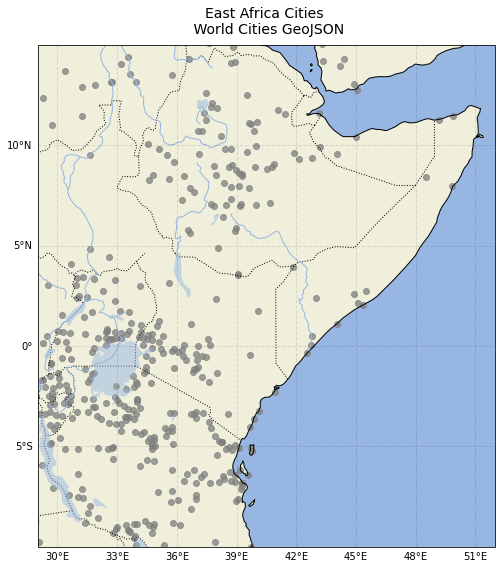

In [22]:
fig = plt.figure()
fig.set_size_inches(10, 8)
ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())
#set_extent(extents, crs=None)[source]
#Set the extent (x0, x1, y0, y1) of the map in the given coordinate system.
#If no crs is given, the extents’ coordinate system will be assumed to be the Geodetic
#version of this axes’ projection.
ax.set_extent([29, 52, -10, 15], crs=ccrs.PlateCarree())
## add features
ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.OCEAN)
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.add_feature(cfeature.LAKES, alpha=0.5)
ax.add_feature(cfeature.RIVERS)

### add data
#ax.add_geometries(gdf_GeoJSON["geometry"], crs=ccrs.PlateCarree(), alpha=0.5)


gdf_GeoJSON.plot(ax=ax, color='grey', alpha=0.75)



##### add gridlines and coordinates
gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True, linewidth=1, color="k", alpha=0.1, linestyle="--")
gl.top_labels = False
gl.right_labels = False
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
#gl.ylines = True
#gl.xlines = True

### add title
ax.set_title('East Africa Cities \n World Cities GeoJSON',
             fontsize = 14,
             y=1.01)

plt.tight_layout()

plt.show()

# Plot using cartopy with the WSR background

background map

In [23]:
#stamen_terrain = cimgt.Stamen('terrain-background')
#Note Stamen basemap will not be available from 31 Oct 2023

In [24]:
## World Shaded Relief

url = 'https://server.arcgisonline.com/ArcGIS/rest/services/World_Shaded_Relief/MapServer/tile/{z}/{y}/{x}.jpg'
WSR_image = cimgt.GoogleTiles(url=url)

plot

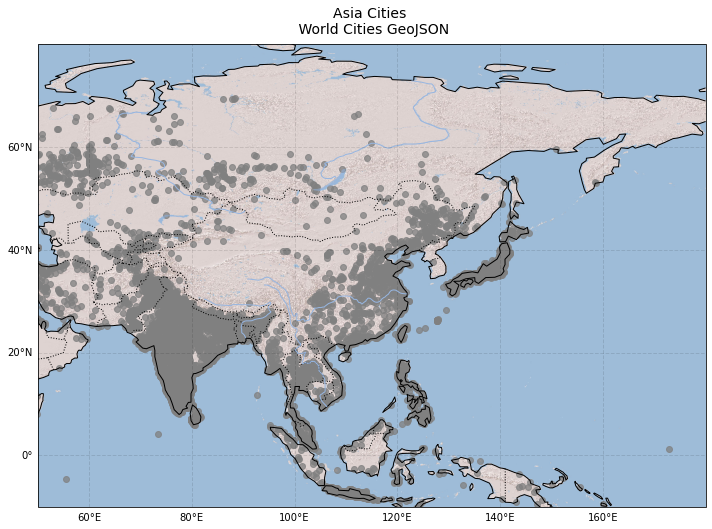

In [25]:
fig = plt.figure()
fig.set_size_inches(10, 8)
ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())
#set_extent(extents, crs=None)[source]
#Set the extent (x0, x1, y0, y1) of the map in the given coordinate system.
#If no crs is given, the extents’ coordinate system will be assumed to be the Geodetic
#version of this axes’ projection.
ax.set_extent([50, 180, -10, 80], crs=ccrs.PlateCarree())
## add features 
ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.OCEAN)
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.add_feature(cfeature.LAKES, alpha=0.5)
ax.add_feature(cfeature.RIVERS)

### add background
ax.add_image(WSR_image, 6)

### add data
#ax.add_geometries(gdf_JSON["geometry"], crs=ccrs.PlateCarree(), alpha=0.5)

gdf_GeoJSON.plot(ax=ax, color='grey', alpha=0.75)


##### add gridlines and coordinates
gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True, linewidth=1, color="k", alpha=0.1, linestyle="--")
gl.top_labels = False
gl.right_labels = False
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
#gl.ylines = True
#gl.xlines = True

### add title
ax.set_title('Asia Cities \n World Cities GeoJSON',
             fontsize = 14,
             y=1.01)

plt.tight_layout()

plt.show()

# Plot using cartopy with the WSR background and an inset

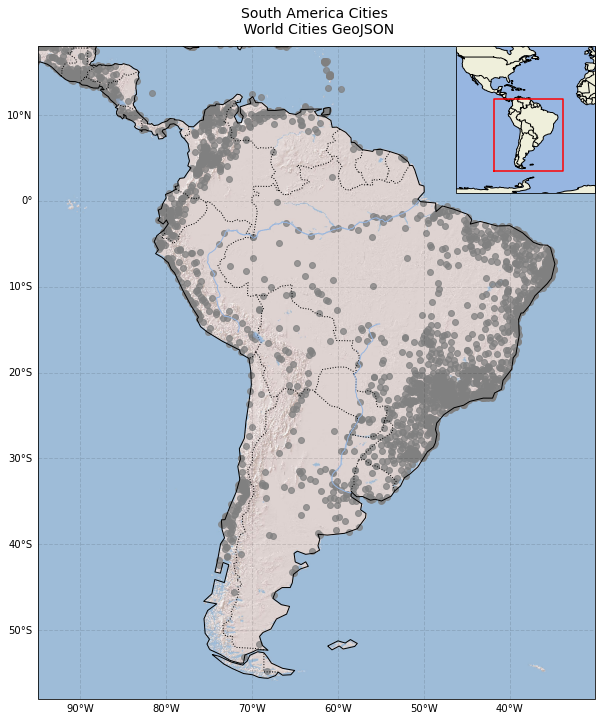

In [26]:
fig = plt.figure()
fig.set_size_inches(14, 12)
ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())
#set_extent(extents, crs=None)[source]
#Set the extent (x0, x1, y0, y1) of the map in the given coordinate system.
#If no crs is given, the extents’ coordinate system will be assumed to be the Geodetic
#version of this axes’ projection.
ax.set_extent([-95, -30, -58, 18 ], crs=ccrs.PlateCarree())
## add features
ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.OCEAN)
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.add_feature(cfeature.LAKES, alpha=0.5)
ax.add_feature(cfeature.RIVERS)

### add background
ax.add_image(WSR_image, 6)

### add data
#ax.add_geometries(gdf_JSON["geometry"], crs=ccrs.PlateCarree(), alpha=0.5)

gdf_GeoJSON.plot(ax=ax, color='grey', alpha=0.75 )

#### add gridlines
gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True, linewidth=1, color="k", alpha=0.1, linestyle="--")
gl.top_labels = False
gl.right_labels = False
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
#gl.ylines = True
#gl.xlines = True


#### add inset
#(left, bottom, width, height)
inset_ax = plt.axes( [0.62, 0.71, 0.2, 0.17], projection=ccrs.PlateCarree() )
## define extent of inset
inset_ax.set_extent([-130, 0, -65, 35 ] )  # you want this extent bit bigger than your raster extent
#(x,y) coord of the region mapped
x_coord = [-95, -95, -30, -30, -95] #Bot-left,Top-Left,Top-Right,Bot-Right,Bot-left
y_coord = [-58, 10, 10, -58, -58] #Bot-left,Top-Left,Top-Right,Bot-Right,Bot-left
#add features for better context
inset_ax.add_feature(cfeature.BORDERS)
inset_ax.add_feature(cfeature.LAND)
inset_ax.add_feature(cfeature.OCEAN)
inset_ax.add_feature(cfeature.COASTLINE)
#add a red box indicating the location
inset_ax.plot(x_coord, y_coord, transform=ccrs.PlateCarree(), zorder=10, color="red")

### add title
ax.set_title('South America Cities \n World Cities GeoJSON',
             fontsize = 14,
             y=1.01)



plt.show()